# Assignment: Predict user conversion based on session data

**Dataset:** Online Shoppers Purchasing Intention Dataset
<br>
**Credits:** Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018)
<br>
**Link to dataset:** https://www.kaggle.com/datasets/henrysue/online-shoppers-intention/data


### Assignment description

An E-commerce company named KokoBananas that sells health and cosmetic products have realised that, in order to stay competitive, they need a better understanding of what constitutes a "good" user experience (UX) on their site. It is assumed that users with a "good" UX converts - so *conversion* is the key metric in this assignment.

Using historical session data, analyse which user behavior leads to conversion. The goal is to create an AI-model, that will, *in real time*, be able to predict whether a user session will convert. The idea is to apply this model on future users in order to quickly determine which user actually become paying customers.

You will present your findings to the company management team. You need to remain object and present both strengths and weaknesses in your predictions. You might even have to report back that it is not possible to use the available data for this prediction. Be mindful of not being too optmistic about your findings - we often fall into the trap of getting swayed by high accuracy - but we always need to criticise this and understand *why* we are getting high accuracy, and if it actually will lead to useful predictions in the future.

The presentation shall be included in the Jupyter Notebook used for analysing the data and training models. The presentation should be understandable for a non-technical person and contain actionable insights. The company management should be helped in making correct decisions based on objective and easy-to-understand results.

### Some initial thoughts on the assignment

- Fun and useful real world application!
- Very open - we are free to use any model we have come across during the course - experimentation nation!
- Will be a good vechile of rehearsing the full course content and applying it throughout.
- It can surely be debated whether conversion is a useful metric for "good" UX. You may have a site that is great at conversion but the users may feel that the UX is awful. "Good" UX can be a very subjective and emotional experience.
- It is a bit vague what the findings will in practice be used for. There is a desire to know in real time which user will convert and at a later stage improve the UX? Will the UX be changed to optimise for conversion? Will Users who are about to drop out of a session without converting be nudged in some way?

### General guidance for the assignment

Remember to keep the code simple and easy to follow. Make use of proper comments, docstrings, typehints etc.
Use markdown cells to, in the simplest terms, motivate your choices.

This is a binary classification exercise. Use this strategy:
- EDA
- Feature Engineering
- Rehearse all classification models used in the course
- Hypothesize which one/ones might be best
- Try all classification models we have used during the course
- See if your hypothesis held or not with the results
- Compare with the paper written by the authors of the dataset

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Throughout the analysis we need easy access to the descriptions of each feature column, including what the values mean.

We can create a dictionary that contains this information. The descriptions of the features are not that detailed or in some cases, also not clear.

The unit of measurement for time spent within a page category is not given.

Furthermore we can group the feature columns for easier viewing later on. Lets create some lists that will be easy to iterate over.

In [80]:
column_descriptions = {
                    "Administrative" : "Number of page visits within this category",
                    "Administrative Duration" : "Time spent within this category",
                    "Informational" : "Number of page visits within this category",
                    "Informational Duration" : "Time spent within this category", 
                    "Product Related" : "Number of page visits within this category", 
                    "Product Related Duration" : "Time spent within this category",
                    "BounceRates" : "Average bounce rate value of the pages visited by the visitor.",
                    "ExitRates" : "Average exit rate value of the pages visited by the visitor .",
                    "PageValues" : "Average page value of the pages visited by the visitor.",
                    "SpecialDay" : "indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.",
                    "Month" : "Month of session",
                    "Weekend" : "Boolean if the session day was in the weekend"
                    }

column_info_page_views_and_duration = ['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated','ProductRelated_Duration']
column_info_google_analytics = ['BounceRates','ExitRates','PageValues']
column_info_time_categories = ['SpecialDay', 'Month', 'Weekend']
column_info_misc_categories = ['OperatingSystems','Browser','Region','TrafficType','VisitorType']

# for MONDAY

Continue cleaning up the crappy category descriptions.
Find erroneaous entries ("Name Sara" under Weekend, Turc & SEpt in Month)

In [9]:
session_data_df = pd.read_csv('project_data.csv')

session_data_df.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
session_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12207 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12146 non-null  float64
 13  Region                   12084 non-null  float64
 14  TrafficType           

First I would like to get to know each column a bit better. Lets start with the min, max, mean and std of each column.

In [78]:
session_data_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,NaN,1.0,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2.0,NaN,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1.0,NaN,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2.0,2.0,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3.0,1.0,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6.0,NaN,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2.0,1.0,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2.0,1.0,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2.0,3.0,11,Returning_Visitor,False,False


In [25]:
session_data_df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [53]:
# create an empty dict to store column information.
column_info = {}

# loop over all columns in the dataframe in order to extract name and relevant information about each column.
for col in session_data_df.columns:

    # if the datatype of the column is numerical, we after max, min, mean values and the standard deviation of the column.
    if session_data_df[col].dtype == int or float:

        # for each - store the column name.
        column_info['name'] = col
        print(col)

        print('Lets do math')
        column_info['max_value'] = session_data_df[col].max()
        column_info['min_value'] = session_data_df[col].min()
        column_info['mean'] = session_data_df[col].mean()
        column_info['standard deviation'] = session_data_df[col].std()

    print(column_info)

    else:
        print('Cannot perform maths on objects')
    

SyntaxError: invalid syntax (4144082651.py, line 22)

In [ ]:
column_info_page_views_and_duration = {}
column_info_google_analytics = {}
column_info_time_categories = {}
column_info_misc_categories = {}

for col in session_data_df.columns:

    if pd.api.types.is_numeric_dtype(session_data_df[col]):

        if col

            column_info_page_views_and_duration[col] = {
                                'data_type' : session_data_df[col].dtype,
                                'max_value' : session_data_df[col].max(),
                                'min_value' : session_data_df[col].min(),
                                'mean_value' : session_data_df[col].mean(),
                                'standard_deviation' : session_data_df[col].std()
                                }
    
    else:
        
        column_info_object[col] = {
                            'data_type' : session_data_df[col].dtype,
                            'unique_values' : session_data_df[col].unique(),                        
                            }
    

In [65]:
pd.Series(session_data_df['Revenue'].value_counts())

Revenue
False    10303
True      1880
Name: count, dtype: int64

In [66]:
(session_data_df['Revenue'].value_counts())

Revenue
False    10303
True      1880
Name: count, dtype: int64

In [79]:
column_info_object

{'Month': {'data_type': dtype('O'),
  'unique_values': array(['Feb', 'Mar', 'May', 'Turc', 'Oct', 'June', 'Jul', 'Aug', 'Nov',
         'Sep', 'Sept', 'Dec'], dtype=object)},
 'VisitorType': {'data_type': dtype('O'),
  'unique_values': array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)},
 'Weekend': {'data_type': dtype('O'),
  'unique_values': array(['False', 'True', 'Name:Zara'], dtype=object)},
 'Revenue': {'data_type': dtype('O'),
  'unique_values': array([False, nan, True], dtype=object)}}

In [73]:
pd.DataFrame(column_info_numerical)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
data_type,int64,float64,int64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,int64
max_value,27,989493.0,24,2549.375,705,63973.52223,2.098952,0.2,361.763742,1.0,8,13.0,9.0,20
min_value,-10,0.0,0,0.0,0,0.0,-0.49868,0.0,0.0,0.0,1,1.0,1.0,1
mean_value,2.2382,1269.776004,0.503569,34.472398,31.731468,1194.74622,0.044239,0.043073,5.889258,0.06126,2.124006,2.360283,3.145647,4.069586
standard_deviation,3.409269,34071.46693,1.270156,140.749294,44.475503,1913.669288,0.239735,0.048597,18.568437,0.19865,0.911325,1.722001,2.40244,4.025169


In [74]:
pd.DataFrame(column_info_object)

,Month,VisitorType,Weekend,Revenue
data_type,object,object,object,object
unique_values,"[Feb, Mar, May, Turc, Oct, June, Jul, Aug, Nov...","[Returning_Visitor, New_Visitor, Other]","[False, True, Name:Zara]","[False, nan, True]"


Let's plot all the columns to get a sense of them.

This is a binary classification exercise. So what will happen if we put the target on our x axis?

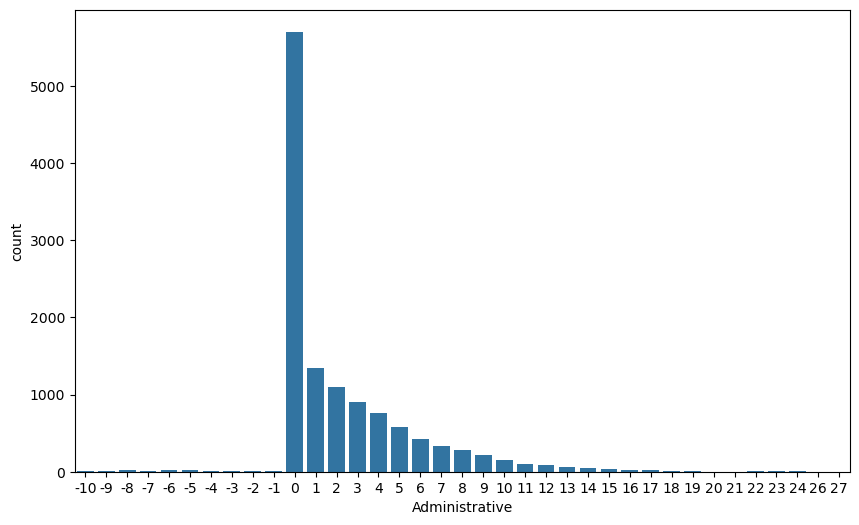

In [22]:
plt.figure(figsize=(10,6))

sns.countplot(data=session_data_df, x='Administrative')

plt.show()